In [1]:
import pandas as pd

In [2]:
from google.colab import drive
# Download the raw data from https://raw.githubusercontent.com/hanying528/covid-news-stock/main/news/cnn_news_data.csv,
# then upload to Google Driver "Colab Notebooks" folder
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

cnn_news_data.csv		  merged_news_stock_price.csv
google_apps_group1.ipynb	  sentiment_analysis.ipynb
googleplaystore.csv		  YahooFinanceStock_daily.csv
googleplaystore_user_reviews.csv  YahooFinanceStock_timeseries.csv


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cnn_news_data.csv").drop_duplicates().reset_index(drop=True)
df.head()

,date,headline
0,2021-07-21,Indonesian Covid-positive man disguises himsel...
1,2021-07-21,'This was my final curtain bow': Athlete's Oly...
2,2021-07-21,Child cases of Covid-19 are rising as schools ...
3,2021-07-19,The latest on the Covid-19 pandemic as Olympic...
4,2021-07-20,More infectious Delta variant makes up 83% of ...


In [5]:
print(df.shape)
print("News started from:", min(df.date))
print("News ended at:", max(df.date))

(2062, 2)
News started from: 2020-02-06
News ended at: 2021-07-21


In [6]:
df_price = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YahooFinanceStock_timeseries.csv")
df_price.head()

,SNP,NDAQ,DJI,formatted_date
0,NaN,NaN,NaN,2020-11-02
1,0.019863,0.014044,0.020609,2020-11-03
2,-0.015629,0.035145,0.013381,2020-11-04
3,0.007328,0.030240,0.019481,2020-11-05
4,0.008002,-0.000075,-0.002353,2020-11-06


In [7]:
print(df_price.shape)
print("Stock price started from:", min(df_price.formatted_date))
print("Stock price ended at:", max(df_price.formatted_date))

(179, 4)
Stock price started from: 2020-11-02
Stock price ended at: 2021-07-20


# 1. EDA

## Text Data

### Text cleaning and word cloud

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

text = ' '.join(df.headline).lower()
words = word_tokenize(text)

In [11]:
filtered_words = [word for word in words if word not in stop_words]
filtered_words = ' '.join(filtered_words)

In [12]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300, collocations=False, background_color="white").generate_from_text(filtered_words)

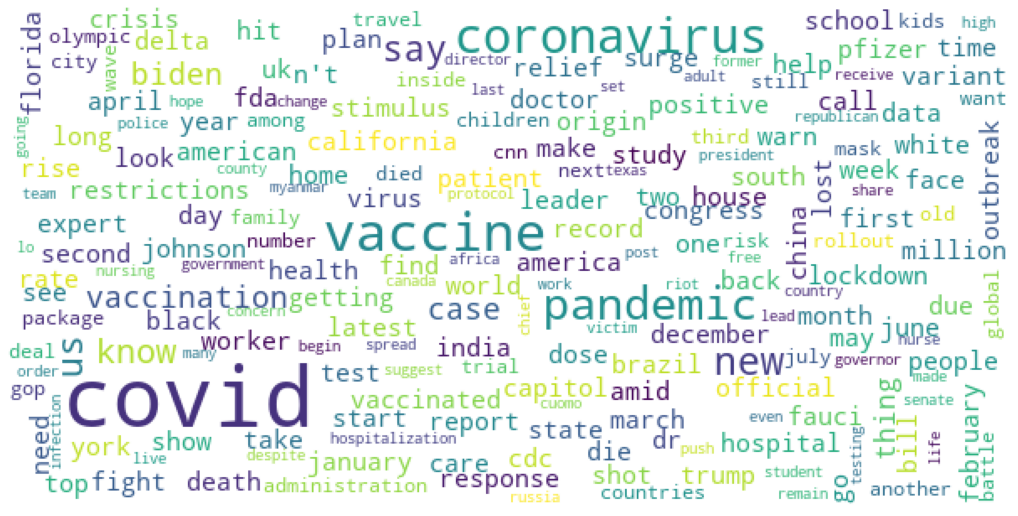

In [13]:
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
# Before merge with stock price data, if a single day has multiple news, concatenate the headlines
df_news = pd.DataFrame()
df_news['date'] = sorted(set(df['date']))
df_news['headline'] = ['. '.join(df[df['date']==dt]['headline'].tolist()) for dt in df_news['date']]

In [15]:
print(df_news.shape)
df_news.head()

(240, 2)


,date,headline
0,2020-02-06,Coronavirus Outbreak Timeline Fast Facts
1,2020-04-16,Veterans mobilize to serve -- and vaccinate --...
2,2020-07-08,This portable ultrasound technology could help...
3,2020-07-27,How Thailand's luxury resorts are adapting to ...
4,2020-08-01,Covid-19 travel restrictions state by state


## Stock Price Data

Clean up date format slightly

In [16]:
# from datetime import datetime
# df_price['formatted_date'] = [str(datetime.strptime(dt, "%m/%d/%Y"))[:10] for dt in df_price['formatted_date']]

In [17]:
# Merge two dataframes
df_all = pd.merge(df_news, df_price, left_on='date', right_on='formatted_date')
df_all.head()

,date,headline,SNP,NDAQ,DJI,formatted_date
0,2020-11-09,Here's who's on Joe Biden's transition Covid-1...,0.059899,-0.026426,0.029467,2020-11-09
1,2020-11-12,Robots are joining the fight against coronavir...,-0.018201,-0.022652,-0.010797,2020-11-12
2,2020-11-18,How risky is flying during a pandemic? What we...,-0.017219,-0.012869,-0.011584,2020-11-18
3,2020-11-23,The latest on the coronavirus pandemic,0.018433,-0.002533,0.011202,2020-11-23
4,2020-11-24,Covid-19 is taking a devastating toll on Filip...,0.006680,0.009999,0.015373,2020-11-24


In [18]:
df_all.shape

(165, 6)

In [19]:
df_all.to_csv('merged_news_stock_price.csv', index=False)

In [20]:
# from google.colab import files
# files.download('merged_news_stock_price.csv')

#### Read Merged Data

In [16]:
mergeData = pd.read_csv("../merged_news_stock_price.csv")

In [3]:
mergeData.head(10)

,date,headline,SNP,NDAQ,DJI,formatted_date,year_month
0,11/9/2020,Here's who's on Joe Biden's transition Covid-1...,0.059899,-0.026426,0.029467,11/9/2020,Nov-20
1,11/12/2020,Robots are joining the fight against coronavir...,-0.018201,-0.022652,-0.010797,11/12/2020,Nov-20
2,11/18/2020,How risky is flying during a pandemic? What we...,-0.017219,-0.012869,-0.011584,11/18/2020,Nov-20
3,11/23/2020,The latest on the coronavirus pandemic. The la...,0.018433,-0.002533,0.011202,11/23/2020,Nov-20
4,11/24/2020,Covid-19 is taking a devastating toll on Filip...,0.006680,0.009999,0.015373,11/24/2020,Nov-20
5,11/27/2020,CDC Covid-19 vaccine advisers call emergency m...,0.012845,-0.001649,0.001269,11/27/2020,Nov-20
6,11/30/2020,Kim Jong Un is cutting off his economic lifeli...,-0.062786,0.006844,-0.009087,11/30/2020,Nov-20
7,12/1/2020,"When can I get a coronavirus vaccine?. Black, ...",0.012422,0.015001,0.000000,12/1/2020,Dec-20
8,12/2/2020,They had only heard about Covid. Then they ret...,0.033742,-0.004234,0.008273,12/2/2020,Dec-20
9,12/3/2020,United Airlines bans couple arrested for alleg...,-0.013141,-0.030806,0.002868,12/3/2020,Dec-20


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
plt.style.use('seaborn-whitegrid')

In [5]:
mergeData['Date']= pd.to_datetime(mergeData['date'])

In [6]:
 np.datetime64(mergeData['Date'].iloc[0], 'Y')

numpy.datetime64('2020')

In [7]:
np.datetime64(mergeData['Date'].iloc[-1], 'Y') 

numpy.datetime64('2021')

In [8]:
# make sure that the type is "Date"
mergeData['Date'] 

0     2020-11-09
1     2020-11-12
2     2020-11-18
3     2020-11-23
4     2020-11-24
         ...    
159   2021-07-14
160   2021-07-15
161   2021-07-16
162   2021-07-19
163   2021-07-20
Name: Date, Length: 164, dtype: datetime64[ns]

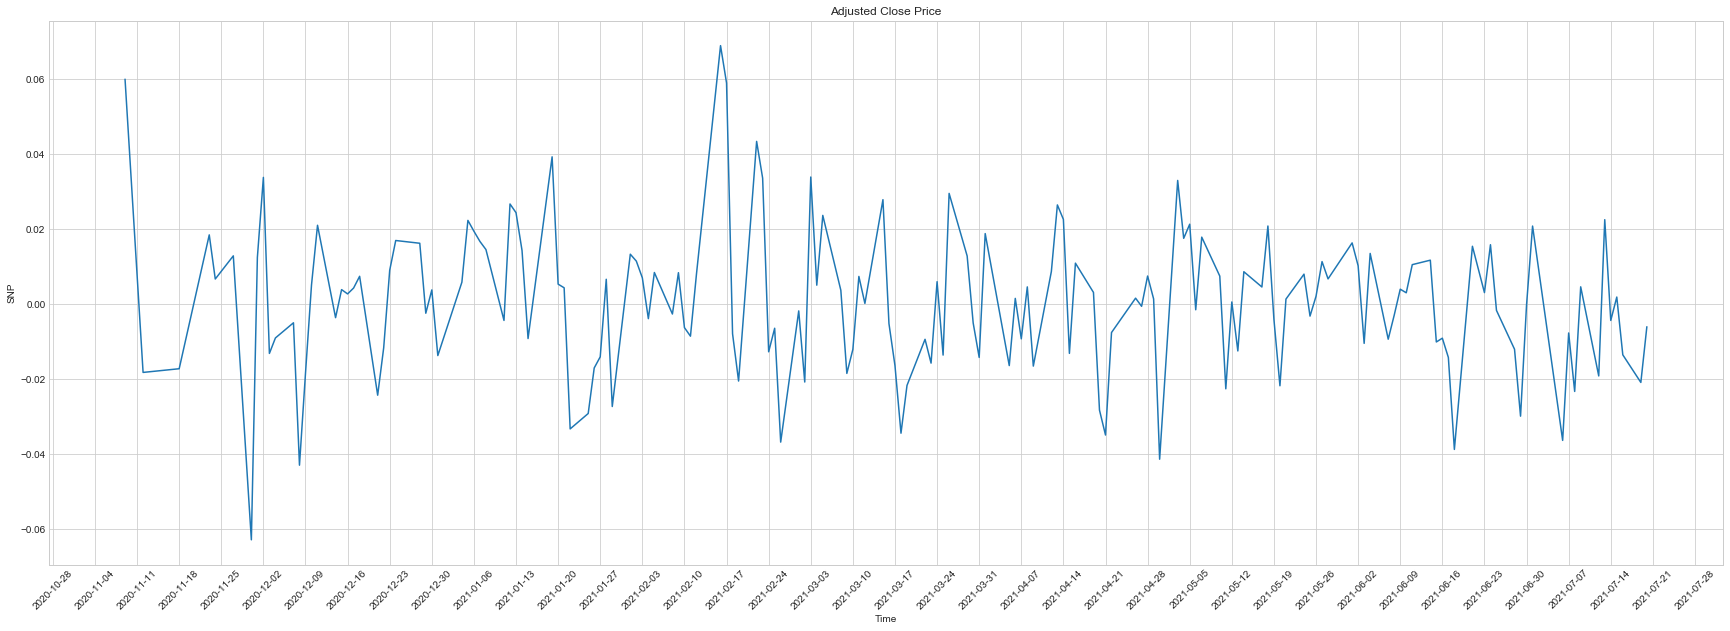

In [14]:
# Plot the trend of SNP
#x = mergeData['formatted_date']
#y = ['Adj Close', 'Volume']

plt.figure(figsize=(30, 10))
plt.xticks(rotation = 90)
ax=sns.lineplot(x='Date', y="SNP",data=mergeData)
ax.set(xlabel='Time', ylabel='SNP', title='Adjusted Close Price')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))   #to get a tick every 15 minutes
#plt.legend(plot, ['SNP'])
plt.xticks(rotation = 45)
#plt.title('Adjusted Close Price')
plt.show()
#plt.plot(x, mergeData['SNP'])


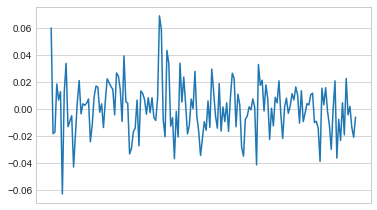

In [15]:
# Plot the trend of SNP
fig, ax = plt.subplots()
ax.plot('date', "SNP",data=mergeData)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)


# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(mergeData['Date'].iloc[0], 'Y')
datemax = np.datetime64(mergeData['Date'].iloc[-1], 'Y') + np.timedelta64(1, 'Y')
#ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

#### Further Merge with Embeddings

In [19]:
Embeddings = pd.read_csv("../tfidf_embeddings.csv")
mergeData = pd.read_csv("../merged_news_stock_price.csv")
Embeddings.shape, mergeData.shape

((164, 50), (164, 7))

In [22]:
result = pd.concat([mergeData, Embeddings], axis = 1)

In [23]:
result.shape

(164, 57)

In [24]:
result.head(10)

,date,headline,SNP,NDAQ,DJI,formatted_date,year_month,tfidf1,tfidf2,tfidf3,...,tfidf41,tfidf42,tfidf43,tfidf44,tfidf45,tfidf46,tfidf47,tfidf48,tfidf49,tfidf50
0,11/9/2020,Here's who's on Joe Biden's transition Covid-1...,0.059899,-0.026426,0.029467,11/9/2020,Nov-20,0.150,-0.07860,-0.0263,...,-0.0159,0.08590,-0.14800,-0.173000,-0.032500,-0.14800,-0.00962,0.1140,0.10200,0.188000
1,11/12/2020,Robots are joining the fight against coronavir...,-0.018201,-0.022652,-0.010797,11/12/2020,Nov-20,0.053,0.30800,0.1010,...,0.0165,-0.03680,-0.02450,-0.006930,0.000383,0.14800,0.01140,-0.2500,-0.06940,0.000175
2,11/18/2020,How risky is flying during a pandemic? What we...,-0.017219,-0.012869,-0.011584,11/18/2020,Nov-20,0.049,0.02820,0.1090,...,-0.1150,-0.13100,0.00389,-0.001660,-0.238000,0.10000,0.11300,0.1780,-0.18100,0.105000
3,11/23/2020,The latest on the coronavirus pandemic. The la...,0.018433,-0.002533,0.011202,11/23/2020,Nov-20,0.137,0.06930,0.3980,...,-0.0402,0.03190,-0.10200,0.080600,0.000432,-0.03180,-0.02980,-0.0355,-0.00833,0.043100
4,11/24/2020,Covid-19 is taking a devastating toll on Filip...,0.006680,0.009999,0.015373,11/24/2020,Nov-20,0.318,-0.00181,-0.0467,...,-0.0510,-0.01890,0.00867,0.000568,-0.051100,0.06170,-0.02110,-0.0317,0.09080,-0.041400
5,11/27/2020,CDC Covid-19 vaccine advisers call emergency m...,0.012845,-0.001649,0.001269,11/27/2020,Nov-20,0.273,-0.03100,-0.0693,...,-0.0176,0.00501,0.00557,-0.074800,-0.102000,0.00967,0.04830,-0.1110,-0.11300,0.084100
6,11/30/2020,Kim Jong Un is cutting off his economic lifeli...,-0.062786,0.006844,-0.009087,11/30/2020,Nov-20,0.250,-0.00836,0.2320,...,-0.0308,-0.08120,-0.11500,0.048300,-0.023800,-0.01310,0.09980,-0.0612,0.04490,-0.081200
7,12/1/2020,"When can I get a coronavirus vaccine?. Black, ...",0.012422,0.015001,0.000000,12/1/2020,Dec-20,0.476,-0.08000,-0.0391,...,-0.0200,-0.06680,-0.00314,0.079000,0.057600,-0.01570,0.04480,-0.0524,-0.01370,-0.067400
8,12/2/2020,They had only heard about Covid. Then they ret...,0.033742,-0.004234,0.008273,12/2/2020,Dec-20,0.201,-0.02000,0.1170,...,0.0607,-0.05560,0.24800,0.000111,0.054300,-0.09480,0.02000,0.0575,0.05650,0.011200
9,12/3/2020,United Airlines bans couple arrested for alleg...,-0.013141,-0.030806,0.002868,12/3/2020,Dec-20,0.419,-0.09820,-0.0291,...,0.0127,-0.00315,-0.02940,0.094900,0.049600,-0.02630,0.04750,-0.0261,-0.02160,0.008830


In [26]:
result.to_csv('../merged_for_modeling.csv', index=False)